In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

/var/folders/t5/ry1gbq2n2r7gk1_tvqx3d2p00000gn/T/ipykernel_18624/2343382043.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train_csv = '../data/nyu2_train.csv'
train_ims_path = '../data/nyu2_train'

df = pd.read_csv(train_csv,header=None)
df[0] = df[0].map(lambda x:f'../{x}')
df[1] = df[1].map(lambda x:f'../{x}')
len(df)

50688

In [3]:
df.head()

,0,1
0,../data/nyu2_train/living_room_0038_out/37.jpg,../data/nyu2_train/living_room_0038_out/37.png
1,../data/nyu2_train/living_room_0038_out/115.jpg,../data/nyu2_train/living_room_0038_out/115.png
2,../data/nyu2_train/living_room_0038_out/6.jpg,../data/nyu2_train/living_room_0038_out/6.png
3,../data/nyu2_train/living_room_0038_out/49.jpg,../data/nyu2_train/living_room_0038_out/49.png
4,../data/nyu2_train/living_room_0038_out/152.jpg,../data/nyu2_train/living_room_0038_out/152.png


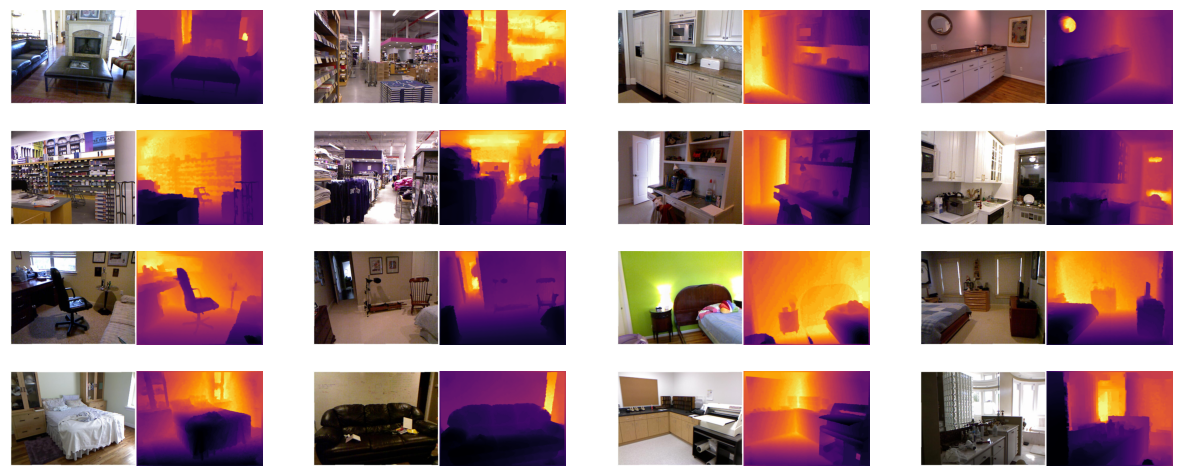

In [4]:
def colored_depthmap(depth, d_min=None, d_max=None,cmap=plt.cm.inferno):
    if d_min is None:
        d_min = np.min(depth)
    if d_max is None:
        d_max = np.max(depth)
    depth_relative = (depth - d_min) / (d_max - d_min)
    return 255 * cmap(depth_relative)[:,:,:3] # H, W, C

def merge_into_row(input, depth_target):
    input = np.array(input)
    depth_target = np.squeeze(np.array(depth_target))

    d_min = np.min(depth_target)
    d_max = np.max(depth_target)
    depth_target_col = colored_depthmap(depth_target, d_min, d_max)
    img_merge = np.hstack([input, depth_target_col])
    
    return img_merge

plt.figure(figsize=(15, 6))
for i, idx in enumerate(np.random.randint(0,len(df),(16,))):
    ax = plt.subplot(4, 4, i + 1)
    image = Image.open(df.iloc[idx,0]).convert('RGB')
    mask = Image.open(df.iloc[idx,1]).convert('L')
    image_viz = merge_into_row(
        image,mask
    )
    plt.imshow(image_viz.astype("uint8"))
    plt.axis("off")